# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [14]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [16]:
# Code a
df.country.unique().size
# Total 219 countries are present

219

In [17]:
# Code b
print(df['year'].min())
print(df['year'].max())
#The timespan of data is from 1980 to 2013

1980
2013


In [18]:
# Code c
df3 = df.groupby(['country'])['country'].count().reset_index(name='count of rows').sort_values(['count of rows'])
df3
# No, each country doesn't have a row for every year.

,country,count of rows
180,South Sudan,3
53,Curacao,4
25,"Bonaire, Saint Eustatius and Saba",4
174,Sint Maarten (Dutch part),4
169,Serbia,9
...,...,...
78,Greece,34
79,Greenland,34
80,Grenada,34
69,Fiji,34


In [19]:
# Code d
df3 = df.groupby(['country'])['country'].count().reset_index(name='count').sort_values(['count'])
df3[df3['count']<34]

,country,count
180,South Sudan,3
53,Curacao,4
25,"Bonaire, Saint Eustatius and Saba",4
174,Sint Maarten (Dutch part),4
169,Serbia,9
126,Montenegro,9
192,Timor-Leste,12
170,Serbia & Montenegro,25
135,Netherlands Antilles,30


In [20]:
# Code e
list_of_cols = ['new_sp_m014', 'new_sp_m1524', 'new_sp_m2534','new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65',
               'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544','new_sp_f4554', 'new_sp_f5564', 'new_sp_f65', 'new_sn_m014',
               'new_sn_m1524', 'new_sn_m2534', 'new_sn_m3544', 'new_sn_m4554','new_sn_m5564', 'new_sn_m65', 'new_sn_f014', 'new_sn_f1524',
               'new_sn_f2534', 'new_sn_f3544', 'new_sn_f4554', 'new_sn_f5564','new_sn_f65', 'new_ep_m014', 'new_ep_m1524', 'new_ep_m2534',
               'new_ep_m3544', 'new_ep_m4554', 'new_ep_m5564', 'new_ep_m65','new_ep_f014', 'new_ep_f1524', 'new_ep_f2534', 'new_ep_f3544',
               'new_ep_f4554', 'new_ep_f5564', 'new_ep_f65', 'newrel_m014','newrel_m1524', 'newrel_m2534', 'newrel_m3544', 'newrel_m4554',
               'newrel_m5564', 'newrel_m65', 'newrel_f014', 'newrel_f1524','newrel_f2534', 'newrel_f3544', 'newrel_f4554','newrel_f5564','newrel_f65']
df[list_of_cols].dropna(thresh=1)
#3484 Rows has at least 1 non-null values across the columns 3-57


,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
17,0.0,10.0,6.0,3.0,5.0,2.0,0.0,5.0,38.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,30.0,129.0,128.0,90.0,89.0,64.0,41.0,45.0,350.0,419.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,8.0,55.0,55.0,47.0,34.0,21.0,8.0,25.0,139.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,52.0,228.0,183.0,149.0,129.0,94.0,80.0,93.0,414.0,565.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,129.0,379.0,349.0,274.0,204.0,139.0,103.0,146.0,799.0,888.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,125.0,578.0,NaN,3471.0,681.0,293.0,192.0,180.0,873.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7236,150.0,710.0,2208.0,1682.0,761.0,350.0,252.0,173.0,974.0,2185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7237,152.0,784.0,2467.0,2071.0,780.0,377.0,278.0,174.0,1084.0,2161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7238,120.0,783.0,2421.0,2086.0,796.0,360.0,271.0,173.0,939.0,2053.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [21]:
# Code
dfLong = (
    df.melt(id_vars=['country','year'], var_name='New', value_name='number_of_cases')
)
dfLong[['diagnosis_method','gender','age']] = dfLong.New.str.split("_",expand=True)
dfLong['diagnosis_method']=dfLong['diagnosis_method']+ dfLong['gender']
dfLong['gender']=dfLong["age"].str[0]
dfLong['age']=dfLong["age"].str[1:]
dfLong.drop('New', axis=1)
dfLong['age']= np.where(dfLong['age'].str.len()==3.0, dfLong["age"].str[0]+'-'+dfLong["age"].str[1:], 
                        dfLong["age"].str[0:2]+'-'+dfLong["age"].str[2:])
dfLong = dfLong.drop(columns=['New'])
dfLong.head()

,country,year,number_of_cases,diagnosis_method,gender,age
0,Afghanistan,1980,NaN,newsp,m,0-14
1,Afghanistan,1981,NaN,newsp,m,0-14
2,Afghanistan,1982,NaN,newsp,m,0-14
3,Afghanistan,1983,NaN,newsp,m,0-14
4,Afghanistan,1984,NaN,newsp,m,0-14


In [22]:
diagmethodMap = {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}  

genderMap = {'m':'male','f':'female'} 

dfLong['diagnosis_method'] = dfLong['diagnosis_method'].map(diagmethodMap)
dfLong['gender'] = dfLong['gender'].map(genderMap)
dfLong.head()

,country,year,number_of_cases,diagnosis_method,gender,age
0,Afghanistan,1980,NaN,Pulmonary Smear (+),male,0-14
1,Afghanistan,1981,NaN,Pulmonary Smear (+),male,0-14
2,Afghanistan,1982,NaN,Pulmonary Smear (+),male,0-14
3,Afghanistan,1983,NaN,Pulmonary Smear (+),male,0-14
4,Afghanistan,1984,NaN,Pulmonary Smear (+),male,0-14


## Question 3: Create a graph that shows when countries started to report TB cases.

In [23]:
df=dfLong[ dfLong['number_of_cases'] > 0]
g=pd.DataFrame(df.groupby('country')['year'].min())
g

,year
country,
Afghanistan,1997
Albania,1995
Algeria,1997
American Samoa,1997
Andorra,1996
...,...
Wallis and Futuna Islands,1996
West Bank and Gaza Strip,1995
Yemen,1995


In [24]:
# Code
import matplotlib.pyplot as plt
import seaborn as sns

graph = pd.DataFrame(dfLong[ dfLong['number_of_cases'] > 0][['country','year']].groupby('country')['year']
                     .min().sort_values())

In [25]:
graph.head()

,year
country,
Canada,1980
Cook Islands,1980
Mongolia,1994
Fiji,1994
Lao People's Democratic Republic,1995


<AxesSubplot:xlabel='year', ylabel='country'>

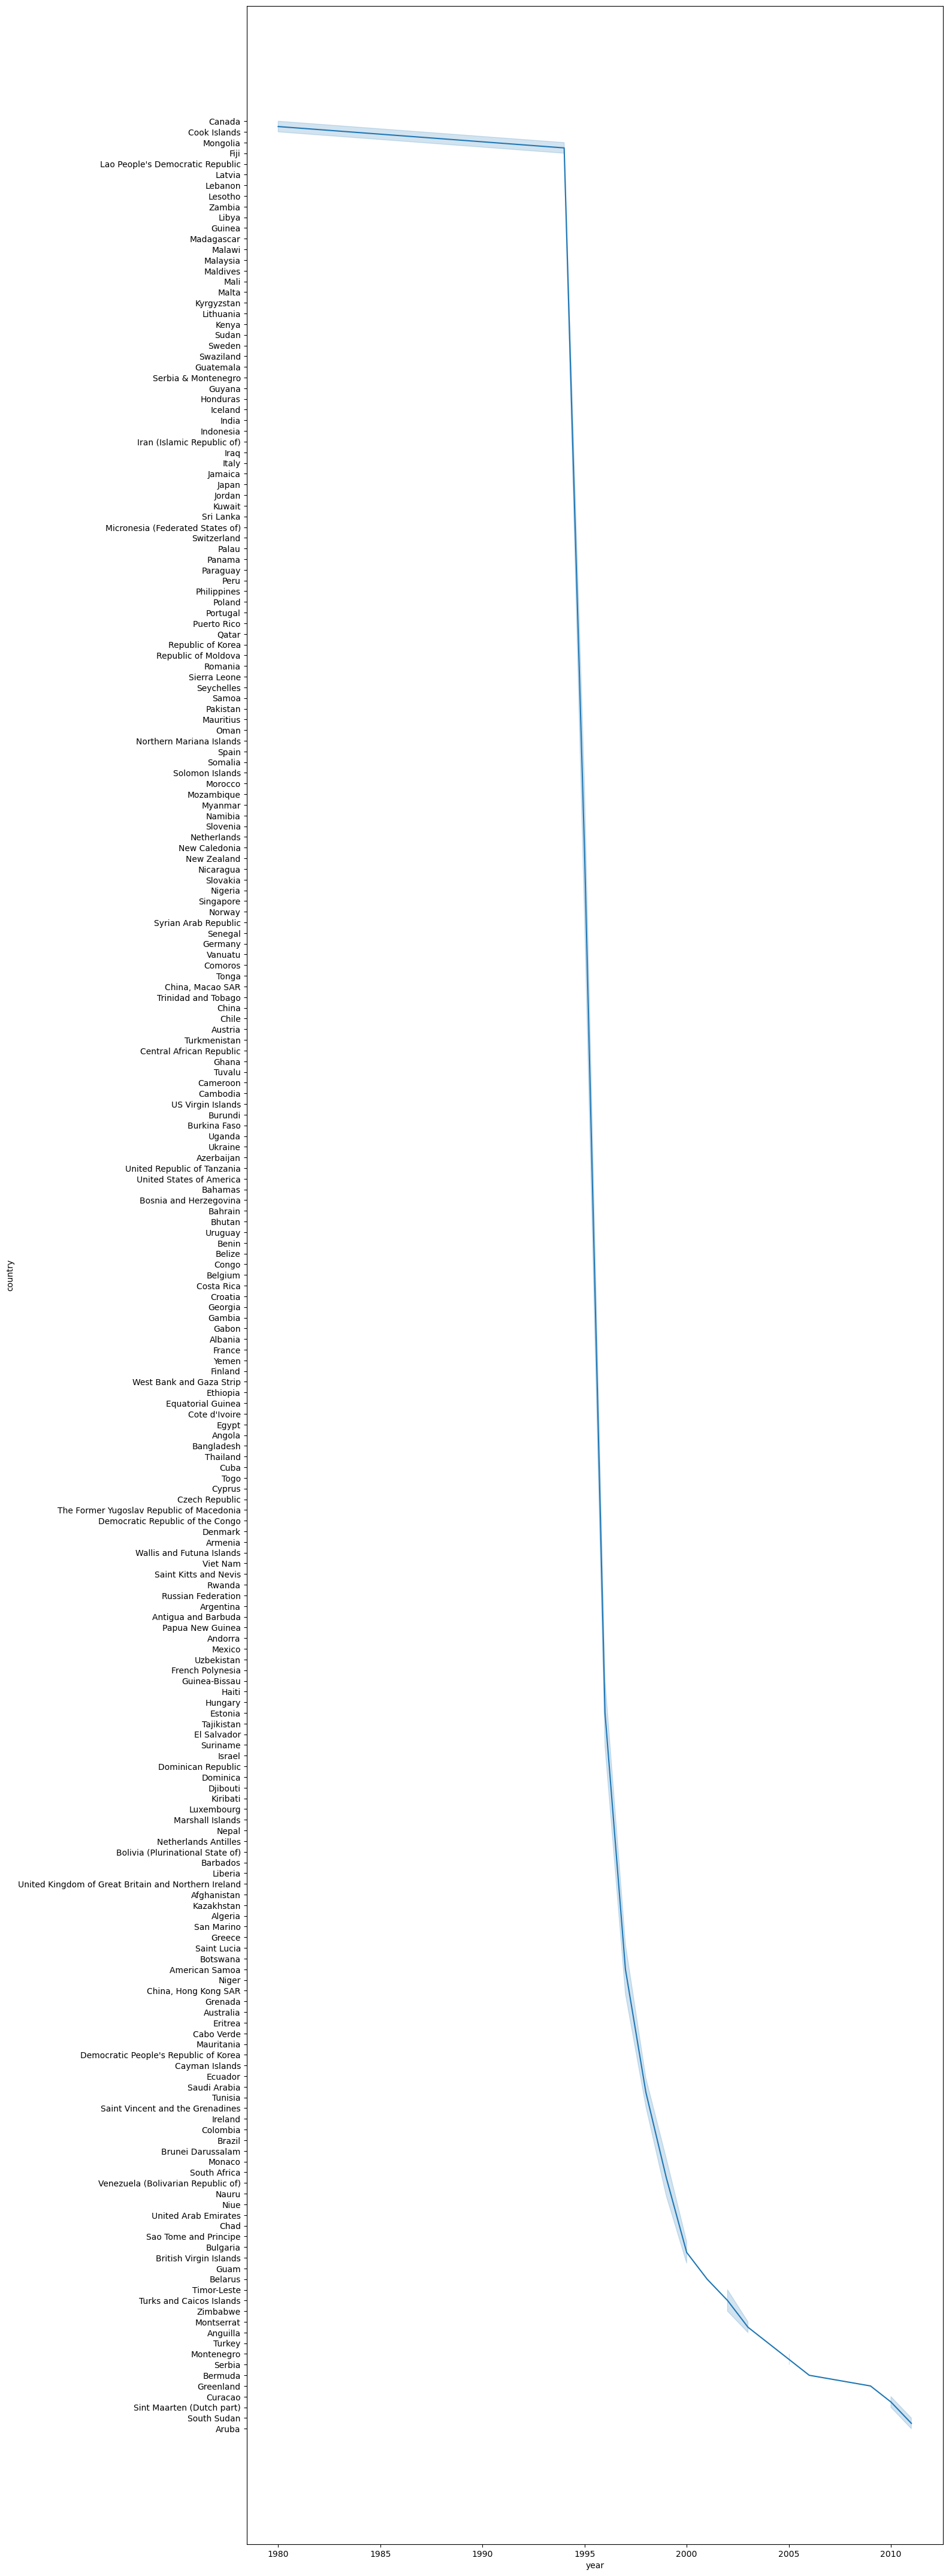

In [30]:
plt.figure(figsize = (15, 55))
sns.lineplot(data=graph, y=graph.index, x="year")

<AxesSubplot:xlabel='country', ylabel='year'>

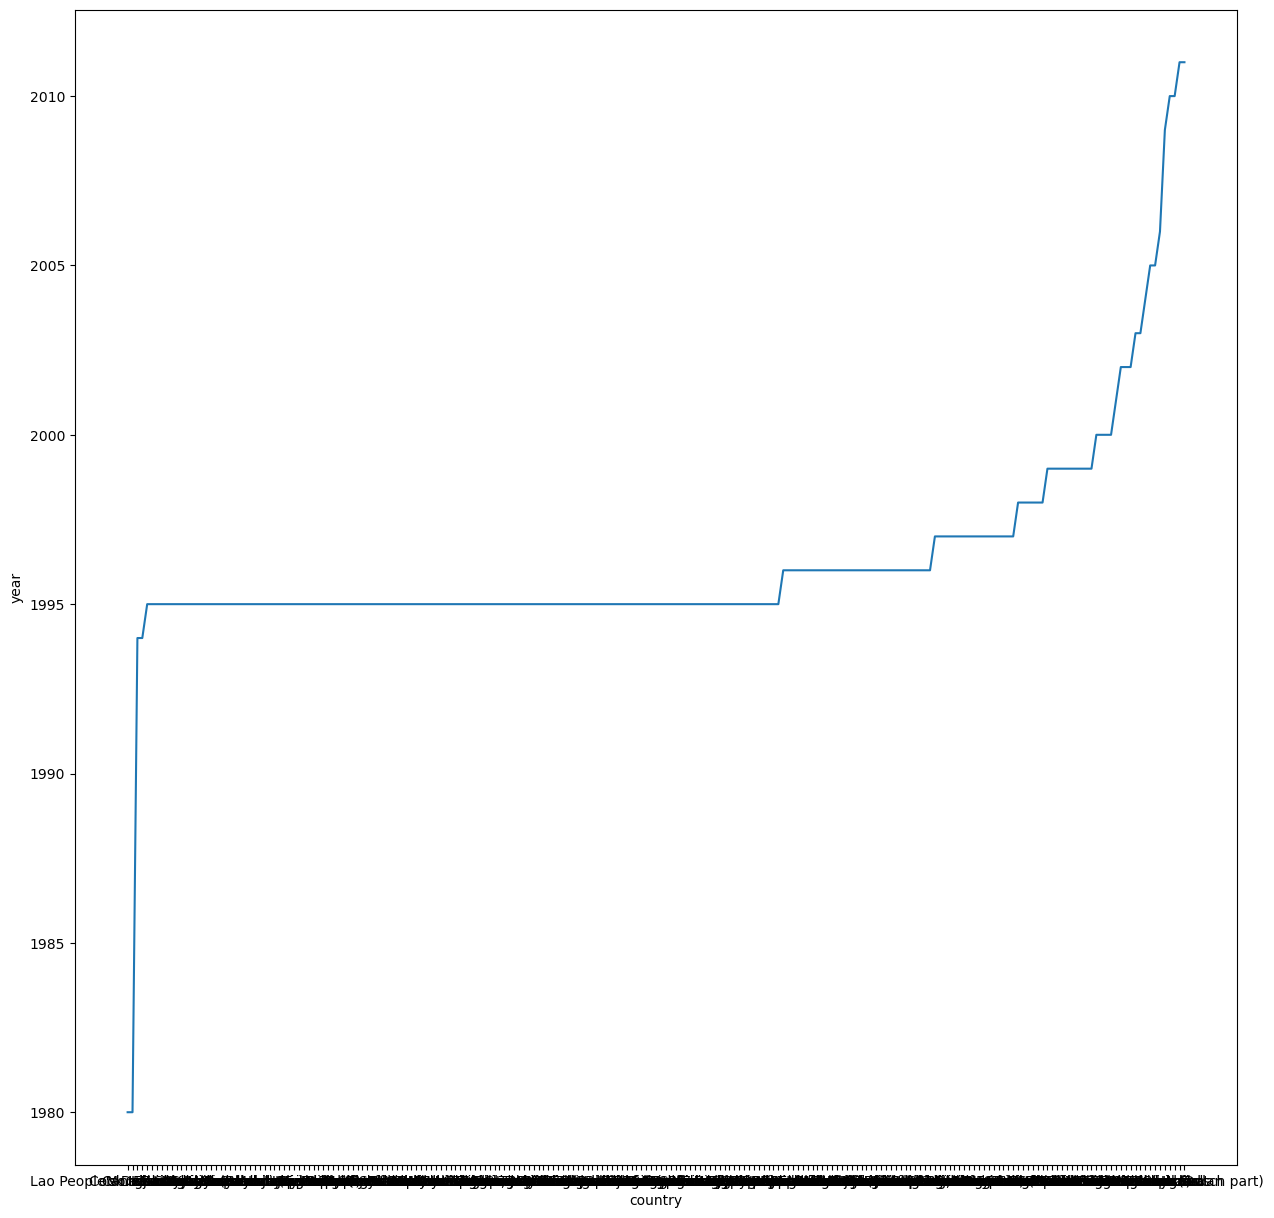

In [34]:
plt.figure(figsize = (15, 15))
sns.lineplot(data=graph, x=graph.index, y="year")

<AxesSubplot:xlabel='year', ylabel='country'>

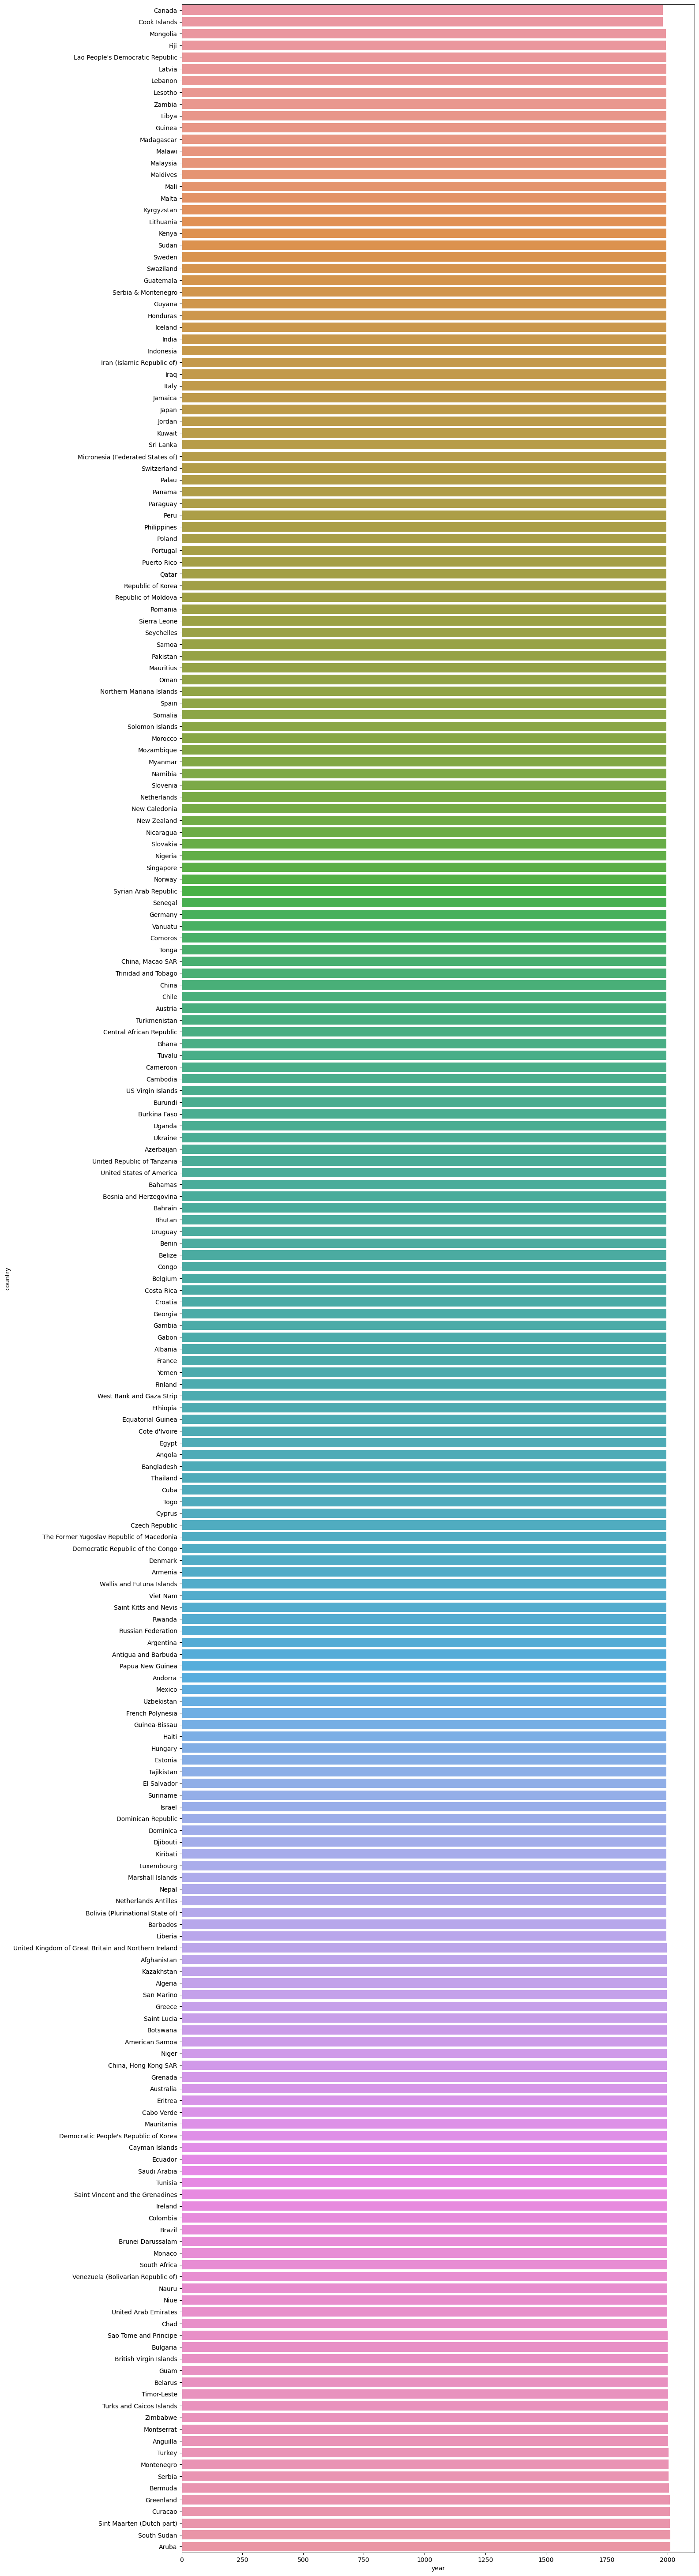

In [26]:
plt.figure(figsize = (15, 75))
sns.barplot(data=graph, y=graph.index, x="year")